In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [4]:
# load the data and split between test and train data
(X_train,y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train[0].shape

(28, 28)

In [8]:
import matplotlib.pyplot as plt

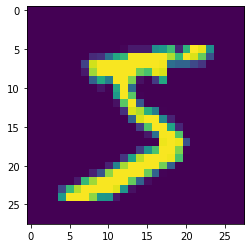

In [9]:
plt.imshow(X_train[0])

In [11]:
y_train[0]

5

In [12]:
# standaring the value in the matrix of the dataset
X_train = X_train/255
X_test = X_test/255

In [34]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss='sparse_categorical_crossentropy',optimizer="Adam",metrics=["accuracy"])

In [37]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2948 - accuracy: 0.9152 - val_loss: 0.1607 - val_accuracy: 0.9538
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1360 - accuracy: 0.9597 - val_loss: 0.1184 - val_accuracy: 0.9650
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0933 - accuracy: 0.9731 - val_loss: 0.1013 - val_accuracy: 0.9692
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0684 - accuracy: 0.9789 - val_loss: 0.0938 - val_accuracy: 0.9716
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0529 - accuracy: 0.9839 - val_loss: 0.0964 - val_accuracy: 0.9720
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0405 - accuracy: 0.9872 - val_loss: 0.0892 - val_accuracy: 0.9744
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0324 - accuracy: 0.9904 - val_loss: 0.0871 - val_accuracy:

In [23]:
prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [38]:
pred = prob.argmax(axis=1)

In [19]:
pred[0]

7

In [20]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_test,pred)

0.9774

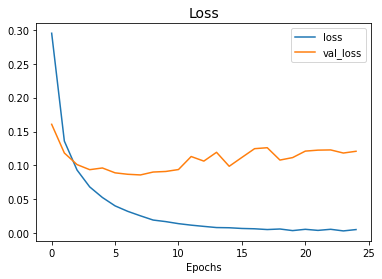

In [47]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel('Epochs')
plt.title("Loss",fontsize=14)
plt.legend(["loss","val_loss"])

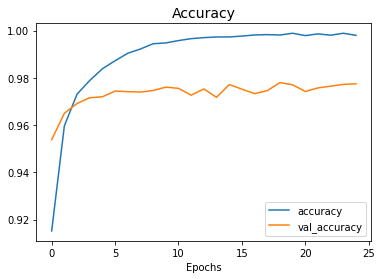

In [48]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel('Epochs')
plt.title("Accuracy",fontsize=14)
plt.legend(["accuracy","val_accuracy"])